In [41]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

In [42]:
train1_df = pd.read_csv('BATADAL_dataset03.csv', index_col='DATETIME')
# train2_df = pd.read_csv('BATADAL_dataset04.csv', index_col=0)
# test_df = pd.read_csv('BATADAL_test_dataset.csv', index_col=0)
train1_df.index = pd.to_datetime(train1_df.index,dayfirst=True)
#train1_df['F_PU1'] = train1_df[['F_PU1']].resample('H').mean()
train1_df.head(50)

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-06 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-01-06 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-01-06 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-01-06 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-01-06 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
2014-01-06 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392,0
2014-01-06 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869,0
2014-01-06 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341,0
2014-01-06 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440,0


In [43]:
min_aic_orders = {}
for column in train1_df:
    if column not in ['ATT_FLAG']:
        ordr = smt.arma_order_select_ic(train1_df[column], max_ar=6, max_ma=5, ic=['aic'], model_kw={'freq':'H'}, fit_kw={'method':'mle'})
        print("AIC being used for {1} is {0}".format(ordr.aic_min_order,column))
        min_aic_orders[column] = ordr.aic_min_order
        break

print (min_aic_orders)

/usr/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:608: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/lib/python3.6/site-pac

AIC being used for L_T1 is (6, 3)
{'L_T1': (6, 3)}


/usr/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not  isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

In [45]:
models = {}
for m in train1_df:
    if m not in ['ATT_FLAG']:
        model = smt.ARMA(train1_df[m], order=min_aic_orders[m], freq='H').fit(disp=0)
        models[m]=model
        break

print(models['L_T1'].summary())

/usr/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                   L_T1   No. Observations:                 8761
Model:                     ARMA(6, 3)   Log Likelihood                6786.404
Method:                       css-mle   S.D. of innovations              0.111
Date:                Sat, 02 Jun 2018   AIC                         -13550.807
Time:                        16:34:41   BIC                         -13472.948
Sample:                    01-06-2014   HQIC                        -13524.278
                         - 01-06-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6782      0.015    178.001      0.000       2.649       2.708
ar.L1.L_T1     4.0098      0.009    455.515      0.000       3.993       4.027
ar.L2.L_T1    -7.1693      0.019   -383.378      0.0

/usr/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


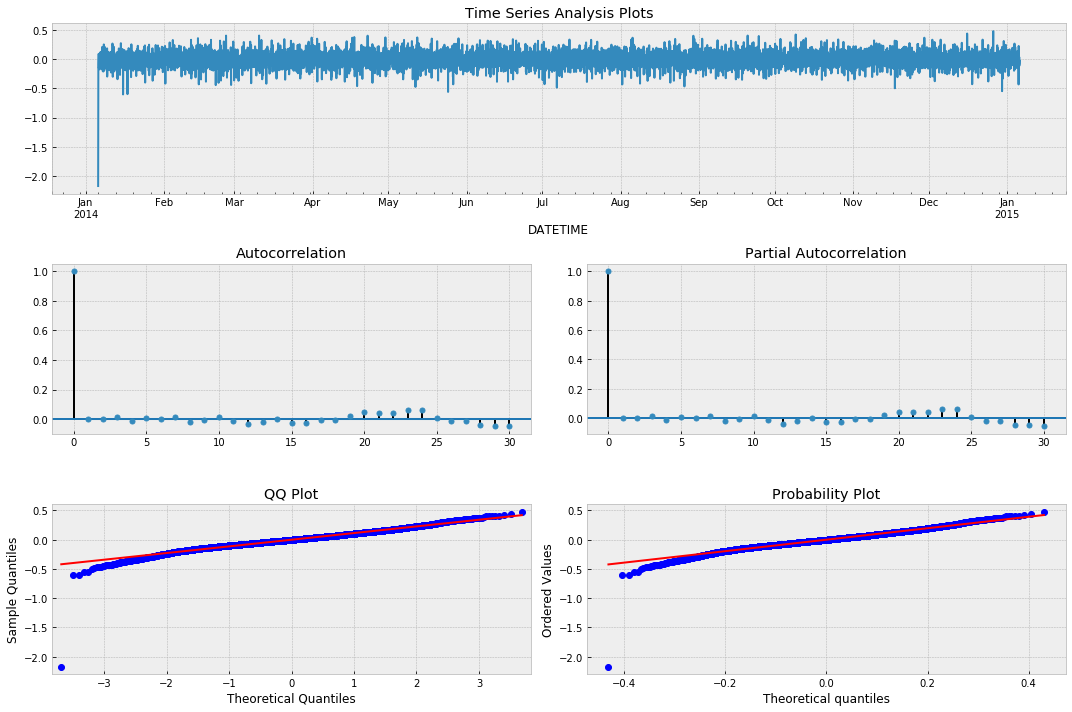

In [46]:
_ = tsplot(models['L_T1'].resid, lags=30)

In [48]:
#test_df = pd.read_csv('BATADAL_test_dataset.csv', index_col=0)
test_df = pd.read_csv('BATADAL_dataset04.csv', index_col=0)
test_df.index = pd.to_datetime(test_df.index,dayfirst=True)
#make a window in the size of  the p in the order
size = min_aic_orders['L_T1'][0]
print(size)
df = test_df[['L_T1']]
df.head(20)

6


,L_T1
DATETIME,
2016-07-04 00:00:00,2.44
2016-07-04 01:00:00,2.66
2016-07-04 02:00:00,3.11
2016-07-04 03:00:00,3.62
2016-07-04 04:00:00,4.08
2016-07-04 05:00:00,4.53
2016-07-04 06:00:00,4.84
2016-07-04 07:00:00,5.19
2016-07-04 08:00:00,5.22


In [49]:
#functions from  https://machinelearningmastery.com/make-manual-predictions-arima-models-python/

def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat


def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

In [50]:
pred = df.values[:size].reshape(size)
start = size
while start < len(df.values):
    history = df.values[start-size:start+1]
    ar_coef, ma_coef = model.arparams, model.maparams
    resid = model.resid[start-size:start]
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff.T[0]) + predict(ma_coef, resid.values)
    pred = np.append(pred, yhat)
    start+=1

df['pred'] = pred.tolist()


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


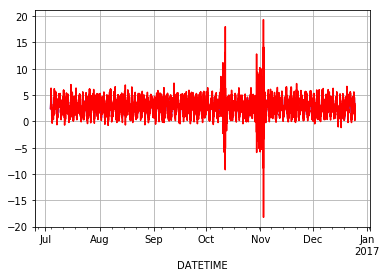

In [51]:
ax1 = df.L_T1.plot(color='blue', grid=True, label='True')
ax2 = df.pred.plot(color='red', grid=True, label='Pred')


plt.show()

                     L_T1  pred  residual  anomily_from_model
DATETIME                                                     
2016-07-04 00:00:00  2.44  2.44       0.0                   0
2016-07-04 01:00:00  2.66  2.66       0.0                   0
2016-07-04 02:00:00  3.11  3.11       0.0                   0
2016-07-04 03:00:00  3.62  3.62       0.0                   0
2016-07-04 04:00:00  4.08  4.08       0.0                   0


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


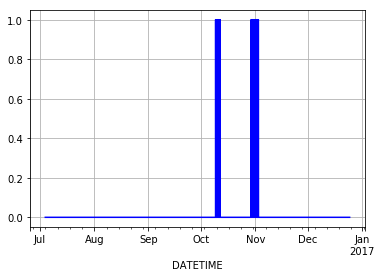

In [57]:
threshold = np.std(df['L_T1'])*3
df['residual'] = df['pred'].sub(df['L_T1'])
df['anomily_from_model'] = np.where(df['residual']> threshold, 1, 0)
ax1 = df['anomily_from_model'].plot(color='blue', grid=True, label='True')
plt.show()

In [ ]:
print("Confusion Matrix")